In [1]:
import tradingeconomics as te
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

In [3]:
       
raw_property_ownership_df = te.getWBIndicator(series_code = 'SG.OWN.PRRT.MR', output_type='df').rename(columns={'last': 'Vote Option'})

raw_nationalid_df = te.getWBIndicator(series_code = 'SG.OBT.IDCD.MR', output_type='df').rename(columns={'last': 'Vote Option'})

raw_court_df = te.getWBIndicator(series_code = 'SG.CRT.TSTM.WT', output_type='df').rename(columns={'last': 'Vote Option'})

raw_leg_df = te.getWBIndicator(series_code = 'SG.LEG.MRRP', output_type='df').rename(columns={'last': 'Vote Option'})


In [4]:

max_votes = max([len(raw_property_ownership_df),len(raw_nationalid_df),len(raw_court_df)])


df = raw_property_ownership_df.groupby(['Vote Option']).count()
property_ownership_df = df[['country']].rename(columns = {'country': 'Question 1'})

df = raw_nationalid_df.groupby(['Vote Option']).count()
nationalid_df = df[['country']].rename(columns = {'country': 'Question 2'})

df = raw_court_df.groupby(['Vote Option']).count()
court_df = df[['country']].rename(columns = {'country': 'Question 3'})

df = raw_leg_df.groupby(['Vote Option']).count()
leg_df = df[['country']].rename(columns = {'country': 'Question 4'})


df = pd.merge(pd.merge(pd.merge(property_ownership_df,nationalid_df, on='Vote Option'),court_df,on='Vote Option'),leg_df,on='Vote Option')

df.loc['Null'] = max_votes - df.sum()
df = df.reindex(index = [0,'Null',1])
df

,Question 1,Question 2,Question 3,Question 4
Vote Option,,,,
0,9,8,10,88
Null,4,28,0,0
1,151,128,154,76


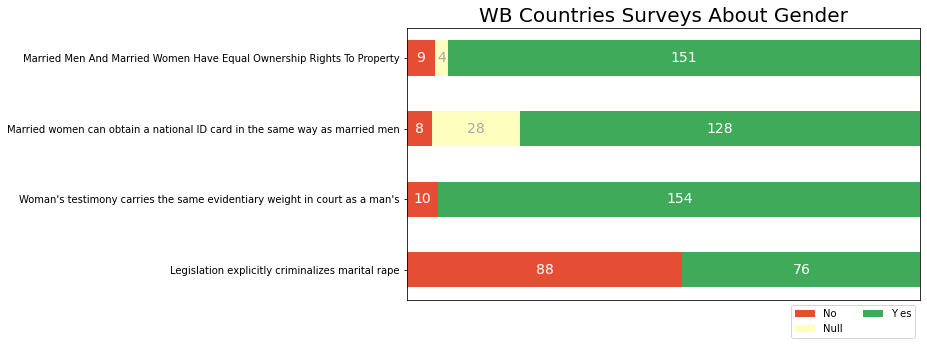

In [5]:
category_names = ['No','Null', 'Y es']
results = {
    'Married Men And Married Women Have Equal Ownership Rights To Property': df['Question 1'].values.tolist(),
    'Married women can obtain a national ID card in the same way as married men': df['Question 2'].values.tolist(),
    'Woman\'s testimony carries the same evidentiary weight in court as a man\'s': df['Question 3'].values.tolist(),
    'Legislation explicitly criminalizes marital rape': df['Question 4'].values.tolist()
}


def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.set_title('WB Countries Surveys About Gender', color='black', size=20)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2
        
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if str(int(c)) != '0':
                ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color, fontsize=14)
    ax.legend(ncol=2, bbox_to_anchor=(1, 0),
              loc='upper right', fontsize='medium')

    return fig, ax


survey(results, category_names)

plt.show()